# Summary figure showing all N standards against reference value

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up to find custom python package
import os
import sys
import numpy as np
sys.path.insert(1, ".")
sys.path.insert(1, "..")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the summary tables for each sample

In [4]:
file_list = [
    "../data/processed/buddingtonite_ANU/nitrogen_summary.csv",
    "../data/processed/hyalophane_StA/N_summary.csv",
    "../data/processed/basaltic_glasses/N_summary_D2872.csv",
    "../data/processed/basaltic_glasses/N_summary_D2893.csv",
    "../data/processed/basaltic_glasses/N_summary_Edi06.csv",
    "../data/processed/basaltic_glasses/N_summary_Edi09.csv",
    "../data/processed/rhyolitic_glasses/N_summary.csv"
]

summary_dfs = []

for f in file_list:
    summary_dfs.append(
        pd.read_csv(f, header = [0, 1], index_col=0)
    )


In [5]:
summary_dfs[0]

1_base                           \
              N wt% (average) N detlim N detlim (orig)   
sample                                                   
buddingtonite         4.28091      NaN          0.0266   

                                                                           \
              N stdev abs (individual spots) N stdev abs (multiple spots)   
sample                                                                      
buddingtonite                        0.82628                     0.193604   

                         2_bg                            \
              N wt% (average)  N detlim N detlim (orig)   
sample                                                    
buddingtonite        4.396926  0.037692          0.0266   

                                                                           \
              N stdev abs (individual spots) N stdev abs (multiple spots)   
sample                                                                      
buddingtonite                       0.864355                     0.187215   

                     3_bg_apf                            \
              N wt% (average)  N detlim N detlim (orig)   
sample                                                    
buddingtonite        5.326502  0.046018          0.0266   

                                                                           
              N stdev abs (individual spots) N stdev abs (multiple spots)  
sample                                                                     
buddingtonite                        1.04711                      0.22553

In [6]:
sample_list = [
    "buddingtonite",
    "hyalophane",
    "D2872",
    "D2893",
    "Edi06",
    "Edi09",
    "A870",
    "A876",
    "B989"
]

In [7]:
combined_df = pd.concat([df.loc[:, "3_bg_apf"] for df in summary_dfs])
combined_df.rename(index = {"hyalophane_BNcalib": "hyalophane"}, inplace=True)
combined_df = combined_df.loc[sample_list, :]
combined_df

,N wt% (average),N detlim,N detlim (orig),N stdev abs (individual spots),N stdev abs (multiple spots)
sample,,,,,
buddingtonite,5.326502,0.046018,0.026600,1.047110,0.225530
hyalophane,0.193386,0.023138,0.023960,0.015546,0.018954
D2872,0.202404,0.023345,0.019036,0.053479,0.029302
D2893,0.066140,0.021335,0.017576,0.024166,0.017490
Edi06,0.010709,0.024201,0.011840,0.002925,0.017177
Edi09,0.097851,0.027984,0.013815,0.028201,0.019538
A870,1.061197,0.023028,0.025225,0.257046,0.042546
A876,0.669863,0.024245,0.025033,0.163301,0.119853
B989,1.174352,0.024907,0.025200,0.284290,0.027740


In [8]:
reference = {
    "buddingtonite": [5.44, np.NaN],
    "hyalophane":  [0.113, 0.015], # from mosenfelder
    "D2872": [0.38, 0.02],
    "D2893": [0.058, 0.011],
    "Edi06": [0, np.NaN],
    "Edi09": [0.124, 0.007],
    "A870": [1.0, 0.4],
    "A876": [0.5, 0.3],
    "B989": [0.9, 0.3]
}

In [9]:
combined_df[["Reference N wt%", "Reference N stdev"]] = [reference[s] for s in sample_list]

In [10]:
combined_df

,N wt% (average),N detlim,N detlim (orig),N stdev abs (individual spots),N stdev abs (multiple spots),Reference N wt%,Reference N stdev
sample,,,,,,,
buddingtonite,5.326502,0.046018,0.026600,1.047110,0.225530,5.440,NaN
hyalophane,0.193386,0.023138,0.023960,0.015546,0.018954,0.113,0.015
D2872,0.202404,0.023345,0.019036,0.053479,0.029302,0.380,0.020
D2893,0.066140,0.021335,0.017576,0.024166,0.017490,0.058,0.011
Edi06,0.010709,0.024201,0.011840,0.002925,0.017177,0.000,NaN
Edi09,0.097851,0.027984,0.013815,0.028201,0.019538,0.124,0.007
A870,1.061197,0.023028,0.025225,0.257046,0.042546,1.000,0.400
A876,0.669863,0.024245,0.025033,0.163301,0.119853,0.500,0.300
B989,1.174352,0.024907,0.025200,0.284290,0.027740,0.900,0.300


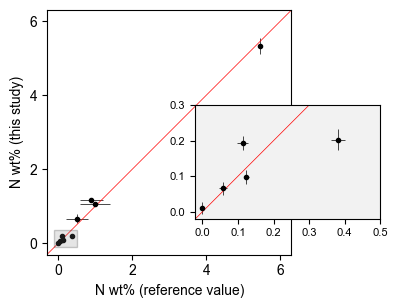

In [12]:
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 10

df = combined_df
fig, ax = plt.subplots(figsize=(10*0.39,8*0.39))
# fig = plt.figure(figsize=(8*0.39, 12*0.39))

plt.errorbar(
    df["Reference N wt%"], 
    df["N wt% (average)"],
    xerr=df["Reference N stdev"],
    yerr=df["N stdev abs (multiple spots)"],
    fmt = ".k",
    lw = 0.5)

plt.axline((0,0), (6,6), color="red", lw=0.5)
plt.xlabel("N wt% (reference value)")
plt.ylabel("N wt% (this study)")

ax.set_xticks(np.arange(0, 8, 2))
ax.set_yticks(np.arange(0, 8, 2))

plt.rcParams["font.size"] = 8
iax = ax.inset_axes(
    [3.7, -0.3, 5, 5],
    transform=ax.transData
)

df_subset = df.loc[df["Reference N wt%"] < 0.5]

iax.errorbar(
    df_subset["Reference N wt%"], 
    df_subset["N wt% (average)"],
    xerr=df_subset["Reference N stdev"],
    yerr=df_subset["N stdev abs (multiple spots)"],
    fmt = ".k",
    lw=0.5)

iax.axline((0,0), (0.25, 0.25), color="red", lw=0.5)

ax.set_aspect(aspect="equal")

# iax.set_xlim(-0.05, 0.5)
# iax.set_ylim(-0.05, 0.5)

iax.set_xticks(np.arange(0, 0.6, 0.1))
iax.set_yticks(np.arange(0, 0.4, 0.1))
iax.set_aspect("equal", adjustable="box")

# ax.indicate_inset_zoom(
#     iax,
#     edgecolor = "red"
#     )

patch, connector_lines = ax.indicate_inset(
    [-0.1, -0.1, 0.6, 0.45],
    inset_ax=iax,
    facecolor="grey",
    alpha=0.2,
    edgecolor="k"
)

connector_lines[0].set_visible(False)
connector_lines[1].set_visible(False)
# connector_lines[2].set_visible(True)
# connector_lines[3].set_visible(True)

iax.set_facecolor([0.95, 0.95, 0.95])

plt.tight_layout()
plt.savefig("../data/figures/N_quant_summary_figure.pdf")
plt.show()